<a href="https://colab.research.google.com/github/rbondili/California_Housing_Data_Modeling/blob/master/PySpark_California_Housing_Dataset_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Spark


boilerplate spark initialization for colab

install v2.4.5 or as per latest stable long term support version

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 217.8MB 64kB/s 
     |████████████████████████████████| 204kB 43.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=c28f1049b4646d5723fb871739e84b1a13b6e69e4292503d58adc8cc476296d0
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

example.1

In [0]:
ls /content/sample_data/

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
train_csv = 'sample_data/california_housing_train.csv'
test_csv = 'sample_data/california_housing_test.csv'

# read the csv file
df = spark.read.csv(path=train_csv, header=True, inferSchema=True, schema=)
df_test = spark.read.csv(path=test_csv, header=True)

In [0]:
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



# Data Exploration

In [0]:
train = df.drop(*['longitude', 'latitude'])
test = df_test.drop(*['longitude', 'latitude'])

In [0]:
train = df
test = df_test

In [0]:
from pyspark.sql.types import IntegerType

train = train.withColumn("longitude", train["longitude"].cast("double"))
train = train.withColumn("latitude", train["latitude"].cast("double"))
train = train.withColumn("housing_median_age", train["housing_median_age"].cast(IntegerType()))
train = train.withColumn("total_rooms", train["total_rooms"].cast(IntegerType()))
train = train.withColumn("total_bedrooms", train["total_bedrooms"].cast(IntegerType()))
train = train.withColumn("population", train["population"].cast(IntegerType()))
train = train.withColumn("households", train["households"].cast(IntegerType()))
train = train.withColumn("median_income", train["median_income"].cast("double"))
train = train.withColumn("median_house_value", train["median_house_value"].cast("double"))


In [0]:
train.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: integer (nullable = true)
 |-- total_rooms: integer (nullable = true)
 |-- total_bedrooms: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- households: integer (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [0]:
from pyspark.sql.types import IntegerType
test = test.withColumn("longitude", test["longitude"].cast("double"))
test = test.withColumn("latitude", test["latitude"].cast("double"))
test = test.withColumn("housing_median_age", test["housing_median_age"].cast(IntegerType()))
test = test.withColumn("total_rooms", test["total_rooms"].cast(IntegerType()))
test = test.withColumn("total_bedrooms", test["total_bedrooms"].cast(IntegerType()))
test = test.withColumn("population", test["population"].cast(IntegerType()))
test = test.withColumn("households", test["households"].cast(IntegerType()))
test = test.withColumn("median_income", test["median_income"].cast("double"))
test = test.withColumn("median_house_value", test["median_house_value"].cast("double"))

In [0]:
test.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: integer (nullable = true)
 |-- total_rooms: integer (nullable = true)
 |-- total_bedrooms: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- households: integer (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



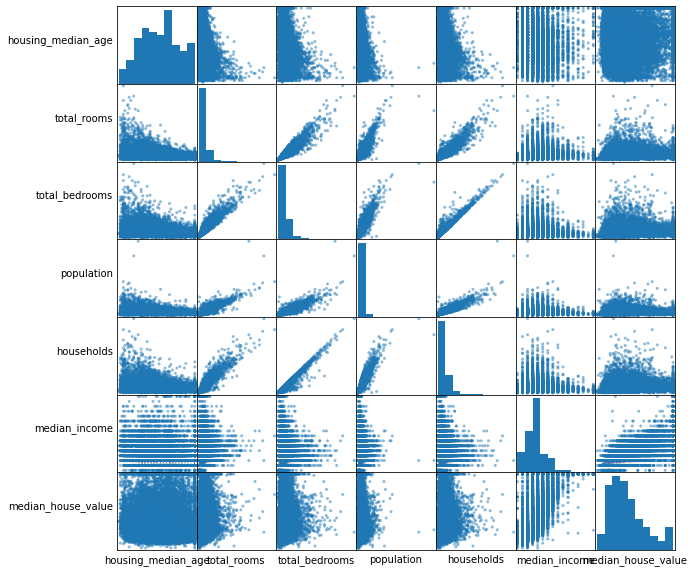

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

numeric_data = train.toPandas()
axs = scatter_matrix(numeric_data, figsize=(10, 10));
n = len(numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(0)
    h.set_xticks(())

#Data Preprocessing

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], 
                            outputCol= 'features')

x_train = assembler.transform(train)
x_train = x_train.select('features', 'median_house_value')
x_train.show(5)

+--------------------+------------------+
|            features|median_house_value|
+--------------------+------------------+
|[-114.31,34.19,15...|           66900.0|
|[-114.47,34.4,19....|           80100.0|
|[-114.56,33.69,17...|           85700.0|
|[-114.57,33.64,14...|           73400.0|
|[-114.57,33.57,20...|           65500.0|
+--------------------+------------------+
only showing top 5 rows



In [0]:
x_test = assembler.transform(test)
x_test = x_test.select('features', 'median_house_value')
x_test.show(5)

+--------------------+------------------+
|            features|median_house_value|
+--------------------+------------------+
|[-122.05,37.37,27...|          344700.0|
|[-118.3,34.26,43....|          176500.0|
|[-117.81,33.78,27...|          270500.0|
|[-118.36,33.82,28...|          330000.0|
|[-119.67,36.33,19...|           81700.0|
+--------------------+------------------+
only showing top 5 rows



# Linear Regression

In [0]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol= 'features', 
                        outputCol= 'features_scaled')

scaler_model = scaler.fit(x_train)
train_sc = scaler_model.transform(x_train)
test_sc = scaler_model.transform(x_test)
train_sc = train_sc.select(train_sc.features_scaled,train_sc.median_house_value.alias('label'))
test_sc = test_sc.select(test_sc.features_scaled,test_sc.median_house_value.alias('label'))
train_sc.show(5)

+--------------------+-------+
|     features_scaled|  label|
+--------------------+-------+
|[-57.007737372644...|66900.0|
|[-57.087531248767...|80100.0|
|[-57.132415304086...|85700.0|
|[-57.137402421344...|73400.0|
|[-57.137402421344...|65500.0|
+--------------------+-------+
only showing top 5 rows



In [0]:
test_sc.show(5)

+--------------------+--------+
|     features_scaled|   label|
+--------------------+--------+
|[-60.867766130095...|344700.0|
|[-58.997597158462...|176500.0|
|[-58.753228412835...|270500.0|
|[-59.027519862008...|330000.0|
|[-59.680832222765...| 81700.0|
+--------------------+--------+
only showing top 5 rows



In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol= 'features_scaled', 
                      labelCol= 'label')
model = lr.fit(train_sc)

In [0]:
output = model.transform(test_sc)

In [0]:
output.take(5)

[Row(features_scaled=DenseVector([-60.8678, 17.4844, 2.1451, 1.7822, 1.5682, 1.339, 1.576, 3.4633]), label=344700.0, prediction=352812.3111175494),
 Row(features_scaled=DenseVector([-58.9976, 16.0293, 3.4162, 0.6927, 0.7355, 0.7048, 0.7204, 1.8861]), label=176500.0, prediction=212717.70074693067),
 Row(features_scaled=DenseVector([-58.7532, 15.8047, 2.1451, 1.6464, 1.2028, 1.2928, 1.2873, 3.0361]), label=270500.0, prediction=272344.69952064054),
 Row(features_scaled=DenseVector([-59.0275, 15.8234, 2.2245, 0.0307, 0.0356, 0.0427, 0.0286, 3.2156]), label=330000.0, prediction=314244.31934805075),
 Row(features_scaled=DenseVector([-59.6808, 16.9978, 1.5095, 0.5693, 0.5789, 0.7405, 0.6164, 1.5394]), label=81700.0, prediction=119644.22238853341)]

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator()
print(evaluator.evaluate(output,{evaluator.metricName: "r2"}))
print(evaluator.evaluate(output,{evaluator.metricName: "mse"}))
print(evaluator.evaluate(output,{evaluator.metricName: "rmse"}))
print(evaluator.evaluate(output,{evaluator.metricName: "mae"}))

0.6195057678313826
4867205486.926525
69765.36022215126
50352.22825769719


# Decision Tree Regression

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features_scaled', labelCol = 'label')
dt_model = dt.fit(train_sc)
dt_predictions = dt_model.transform(test_sc)
dt_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction")

print("R Squared (R^2) on test data = %g" % dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "r2"}))
print("Mean Squared Error (MSE) on test data = %g" % dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "mse"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "rmse"}))
print("Mean Absolute Error (MAE) on test data = %g" % dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "mae"}))

R Squared (R^2) on test data = 0.569361
Mean Squared Error (MSE) on test data = 5.50865e+09
Root Mean Squared Error (RMSE) on test data = 74220.3
Mean Absolute Error (MAE) on test data = 54010.6


In [0]:
dt_model.featureImportances

SparseVector(8, {0: 0.088, 1: 0.0601, 2: 0.0662, 3: 0.0014, 4: 0.0014, 6: 0.0017, 7: 0.7812})

# Random Forest Regression

In [0]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features_scaled")
rf_model = rf.fit(train_sc)
rf_predictions = rf_model.transform(test_sc)
rf_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction")

print("R Squared (R^2) on test data = %g" % rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "r2"}))
print("Mean Squared Error (MSE) on test data = %g" % rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "mse"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "rmse"}))
print("Mean Absolute Error (MAE) on test data = %g" % rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "mae"}))

R Squared (R^2) on test data = 0.594659
Mean Squared Error (MSE) on test data = 5.18504e+09
Root Mean Squared Error (RMSE) on test data = 72007.2
Mean Absolute Error (MAE) on test data = 53375.5


In [0]:
rf_model.featureImportances

SparseVector(8, {0: 0.1581, 1: 0.1588, 2: 0.032, 3: 0.0196, 4: 0.0027, 5: 0.0138, 6: 0.0034, 7: 0.6116})

# Gradient Boosted Trees Regression

In [0]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol="features_scaled")
gbt_model = gbt.fit(train_sc)
gbt_predictions = gbt_model.transform(test_sc)
gbt_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction")

print("R Squared (R^2) on test data = %g" % gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "r2"}))
print("Mean Squared Error (MSE) on test data = %g" % gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "mse"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "rmse"}))
print("Mean Absolute Error (MAE) on test data = %g" % gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "mae"}))

R Squared (R^2) on test data = 0.594659
Mean Squared Error (MSE) on test data = 5.18504e+09
Root Mean Squared Error (RMSE) on test data = 72007.2
Mean Absolute Error (MAE) on test data = 53375.5


In [0]:
gbt_model.featureImportances

SparseVector(8, {0: 0.1581, 1: 0.1588, 2: 0.032, 3: 0.0196, 4: 0.0027, 5: 0.0138, 6: 0.0034, 7: 0.6116})

# Neural Networks

In [0]:
from pyspark.ml.regression import MultilayerPerceptronRegressor

# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 
layers = [6, 18, 9, 1]

# create the trainer and set its parameters
mpr = MultilayerPerceptronRegressor(maxIter=10, layers=layers, seed=1234)

mpr_model = mpr.fit(train_sc)
mpr_predictions = mpr_model.transform(test_sc)
mpr_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction")

print("R Squared (R^2) on test data = %g" % mpr_evaluator.evaluate(mpr_predictions,{mpr_evaluator.metricName: "r2"}))
print("Mean Squared Error (MSE) on test data = %g" % mpr_evaluator.evaluate(mpr_predictions,{mpr_evaluator.metricName: "mse"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % mpr_evaluator.evaluate(mpr_predictions,{mpr_evaluator.metricName: "rmse"}))
print("Mean Absolute Error (MAE) on test data = %g" % mpr_evaluator.evaluate(mpr_predictions,{mpr_evaluator.metricName: "mae"}))

ImportError: ignored

# Performance Report by Model

In [0]:
# create pandas dataframe
model_results = pd.DataFrame({'Model': ["Linear Regression",
                             "Decision Tree",
                             "Random Forest", 
                             "Gradiant Boosted Tree"], 
                   'R-Squared R^2':[evaluator.evaluate(output,{evaluator.metricName: "r2"}),
                                    dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "r2"}),
                                    rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "r2"}),
                                    gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "r2"})],
                   'Mean Squared Error (MSE)':[evaluator.evaluate(output,{evaluator.metricName: "mse"}),
                                               dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "mse"}),
                                               rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "mse"}),
                                               gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "mse"})],
                   'Root Mean Squared Error (RMSE)':[evaluator.evaluate(output,{evaluator.metricName: "rmse"}),
                                                     dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "rmse"}),
                                                     rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "rmse"}),
                                                     gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "rmse"})],
                   'Mean Absolute Error (MAE)':[evaluator.evaluate(output,{evaluator.metricName: "mae"}),
                                                dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "mae"}),
                                                rf_evaluator.evaluate(rf_predictions,{rf_evaluator.metricName: "mae"}),
                                                gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "mae"})]
                   })

# convert to spark dataframe
model_results = spark.createDataFrame(model_results)
model_results.show()

+--------------------+------------------+------------------------+------------------------------+-------------------------+
|               Model|     R-Squared R^2|Mean Squared Error (MSE)|Root Mean Squared Error (RMSE)|Mean Absolute Error (MAE)|
+--------------------+------------------+------------------------+------------------------------+-------------------------+
|   Linear Regression|0.6195057678313826|     4.867205486926525E9|             69765.36022215126|        50352.22825769719|
|       Decision Tree|0.5693605532284071|     5.508652959776918E9|              74220.3001865185|        54010.60920963263|
|       Random Forest|0.5946592527026437|     5.185037097871966E9|             72007.20170838447|        53375.51441570678|
|Gradiant Boosted ...|0.5946592527026437|     5.185037097871966E9|             72007.20170838447|        53375.51441570678|
+--------------------+------------------+------------------------+------------------------------+-------------------------+

